# 生成所有点的gif动态图像

用于观察数据特征

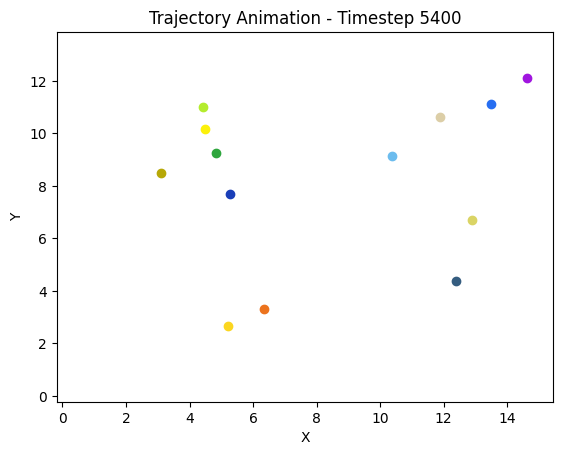

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

# 读取数据
file_path = r'D:\xjtufiles\undergraduate\2023-2024\spring\ml\Pedestrian clustering\students003.txt'
data = np.loadtxt(file_path)

# 提取数据
timesteps = data[:, 0].astype(int)
ids = data[:, 1].astype(int)
xs = data[:, 2]
ys = data[:, 3]

# 获取唯一的时间步
unique_timesteps = np.unique(timesteps)
unique_ids = np.unique(ids)

# 分配随机颜色
np.random.seed(42)  # 固定种子，以保证相同运行环境的结果一致
colors = np.random.rand(len(unique_ids), 3)

# 设置图形
fig, ax = plt.subplots()
ax.set_xlim(np.min(xs), np.max(xs))
ax.set_ylim(np.min(ys), np.max(ys))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Trajectory Animation')

# 更新每一帧
def update(frame):
    current_timestep = unique_timesteps[frame]
    current_data = data[timesteps == current_timestep]
    ax.clear()
    ax.set_xlim(np.min(xs), np.max(xs))
    ax.set_ylim(np.min(ys), np.max(ys))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Trajectory Animation - Timestep {current_timestep}')
    
    for i, uid in enumerate(unique_ids):
        user_data = current_data[current_data[:, 1] == uid]
        if len(user_data) > 0:
            ax.scatter(user_data[:, 2], user_data[:, 3], color=colors[i])

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=len(unique_timesteps), repeat=False)

# 保存每一帧为图片
frames = []
for i in range(len(unique_timesteps)):
    update(i)
    plt.savefig(f'frame_{i}.png')
    frames.append(Image.open(f'frame_{i}.png'))

# 使用 ImageMagick 合成视频
frames[0].save('trajectory_animation.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)

plt.show()


In [4]:
import numpy as np

# 读取数据
file_path = r'D:\xjtufiles\undergraduate\2023-2024\spring\ml\Pedestrian clustering\students003.txt'
data = np.loadtxt(file_path)

# 提取数据
timesteps = data[:, 0].astype(int)
ids = data[:, 1].astype(int)
xs = data[:, 2]
ys = data[:, 3]

# 确定唯一的 ID 和时间步
unique_ids = np.unique(ids)
unique_timesteps = np.unique(timesteps)

# 确定张量的形状
num_ids = len(unique_ids)
num_timesteps = len(unique_timesteps)
tensor_shape = (num_ids, num_timesteps, 2)  # 最后一个维度为2，分别对应X和Y

# 创建并初始化张量
tensor = np.zeros(tensor_shape)

# 填充张量
for i, uid in enumerate(unique_ids):
    for j, timestep in enumerate(unique_timesteps):
        idx = np.where((ids == uid) & (timesteps == timestep))[0]
        if len(idx) > 0:
            tensor[i, j, 0] = xs[idx]
            tensor[i, j, 1] = ys[idx]

# 保存张量
np.save('pedestrian_tensor.npy', tensor)


C:\Users\11094\AppData\Local\Temp\ipykernel_808\1545187493.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tensor[i, j, 0] = xs[idx]
C:\Users\11094\AppData\Local\Temp\ipykernel_808\1545187493.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tensor[i, j, 1] = ys[idx]


In [5]:
print(tensor_shape)

(434, 541, 2)


In [6]:
import numpy as np
from scipy.spatial import distance_matrix

# 读取张量
tensor = np.load('pedestrian_tensor.npy')

# 获取张量的形状
num_ids, num_timesteps, _ = tensor.shape

# 初始化一个空矩阵来保存距离之和
distance_matrix_sum = np.zeros((num_ids, num_ids))

# 计算欧氏距离之和
for i in range(num_ids):
    for j in range(num_ids):
        # 获取两个 ID 的坐标
        coords_i = tensor[i, :, :]
        coords_j = tensor[j, :, :]

        # 计算两个 ID 所有时间步的欧氏距离之和
        # 对应时间步的坐标距离之和
        dist_sum = np.sum(np.sqrt(np.sum((coords_i - coords_j) ** 2, axis=1)))
        
        # 保存到矩阵
        distance_matrix_sum[i, j] = dist_sum

# 保存矩阵
np.save('distance_matrix_sum.npy', distance_matrix_sum)

# 输出矩阵
print(distance_matrix_sum)


[[   0.          119.82860806  425.17951304 ...  922.21471903
   447.20698525  676.35754468]
 [ 119.82860806    0.          502.59844597 ...  852.09375658
   377.0860228   606.23658222]
 [ 425.17951304  502.59844597    0.         ... 1232.94826259
   757.94052881  987.09108824]
 ...
 [ 922.21471903  852.09375658 1232.94826259 ...    0.
   928.16774767 1157.3183071 ]
 [ 447.20698525  377.0860228   757.94052881 ...  928.16774767
     0.          682.31057332]
 [ 676.35754468  606.23658222  987.09108824 ... 1157.3183071
   682.31057332    0.        ]]


C:\Users\11094\AppData\Local\Temp\ipykernel_19776\756533154.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix_sum, method='ward')  # 选择'ward' 方法，适用于欧式距离矩阵


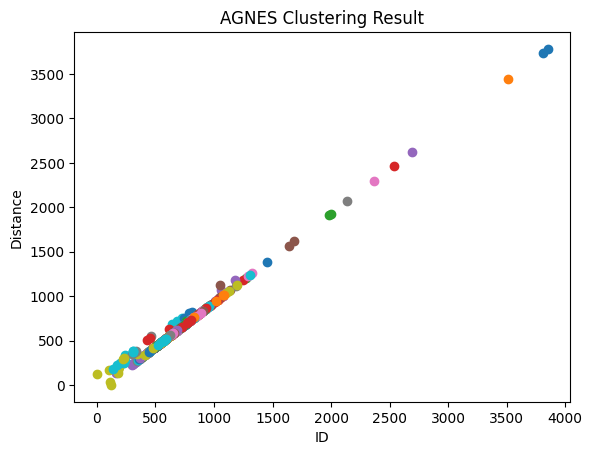

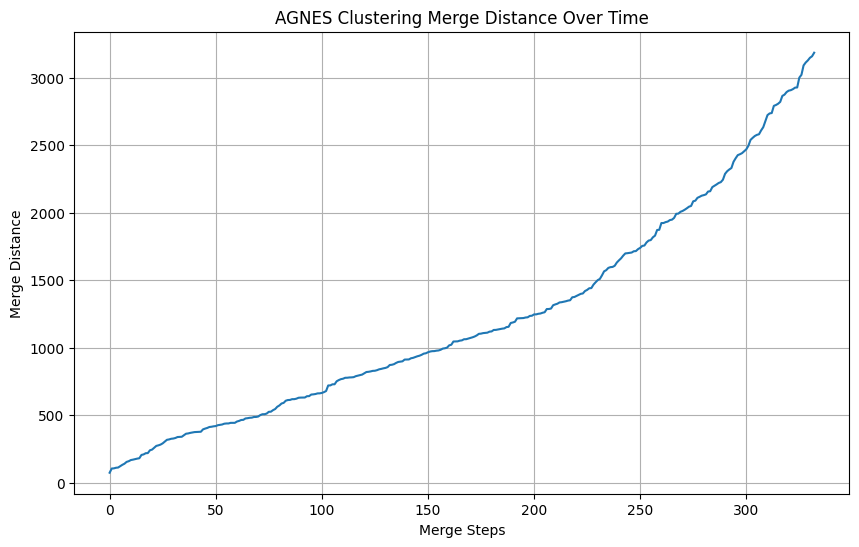

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# 读取距离矩阵
distance_matrix_sum = np.load('distance_matrix_sum.npy')

# AGNES 聚类算法
Z = linkage(distance_matrix_sum, method='ward')  # 选择'ward' 方法，适用于欧式距离矩阵
max_clusters = 150  # 可以根据实际需要调整聚类数
clusters = fcluster(Z, max_clusters, criterion='maxclust')

# 保存合并结果距离
merge_distances = []

# 遍历合并过程
for i in range(len(Z)-100):# 只显示聚类类别小于350的情况，因为后面的误差太大影响观察
    # 合并结果中的每个合并步骤
    merge_distances.append(Z[i, 2])

# 可视化聚类结果
fig, ax = plt.subplots()
for i in range(len(np.unique(clusters))):
    cluster_points = np.argwhere(clusters == i+1)
    ax.scatter(distance_matrix_sum[cluster_points, 0], distance_matrix_sum[cluster_points, 1], label=f'Cluster {i}')

ax.set_xlabel('ID')
ax.set_ylabel('Distance')
ax.set_title('AGNES Clustering Result')
##ax.legend()
plt.show()

# 画折线图展示合并距离变化
plt.figure(figsize=(10, 6))
plt.plot(range(len(merge_distances)), merge_distances)
plt.xlabel('Merge Steps')
plt.ylabel('Merge Distance')
plt.title('AGNES Clustering Merge Distance Over Time')
plt.grid()
plt.show()

# 输出聚类结果
np.savetxt('agnes_clustered_results.txt', clusters, fmt='%d', delimiter=' ')


In [21]:
print(merge_distances)

[74.43721804575809, 105.50933222317633, 106.69693875476241, 111.18958201651529, 112.89021044789769, 122.89636082719846, 132.99632420054186, 141.21308527875348, 154.62682770528235, 159.69869678981792, 168.2094672016849, 171.20009693133375, 175.05919584095741, 178.80921253606954, 181.64297327722971, 206.0874278820598, 209.93565269763795, 218.7981098549581, 219.81082086217646, 240.6027110475139, 245.5272680210422, 259.6417071350493, 273.0395991864481, 277.1441933614768, 282.75936105117773, 291.77071736633445, 304.73249222892264, 318.0349752664568, 320.81955887615305, 325.67319473294157, 327.498096635756, 331.52836621982095, 338.6226507083126, 339.62054747264216, 340.6645516647348, 352.2203770307495, 363.07201569350644, 365.2296643312809, 369.3873669121677, 372.4323639515375, 375.21767555301506, 375.86201623050573, 377.2541150679751, 377.7667392547296, 395.17540639773864, 401.0949507252294, 405.89840764555487, 412.87337457520437, 414.8013199830366, 417.9133974748045, 419.7454295307891, 426

In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
# 转换成 DataFrame
df_merge_distances = pd.DataFrame(merge_distances)

# 保存到 Excel 文件
excel_path = 'merge_distances.xlsx'
df_merge_distances.to_excel(excel_path, index=False)

In [29]:
frames[0].save('trajectory_animation.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)

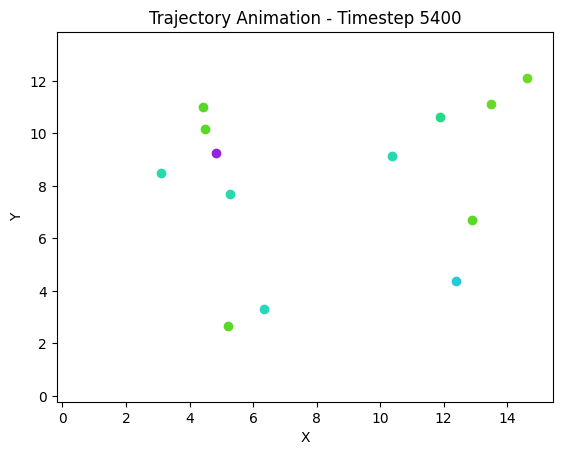

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import colorsys

# 读取数据
file_path_data = r'D:\xjtufiles\undergraduate\2023-2024\spring\ml\Pedestrian clustering\students003.txt'
data = np.loadtxt(file_path_data)

# 读取聚类结果
file_path_clusters = r'D:\xjtufiles\undergraduate\2023-2024\spring\ml\Pedestrian clustering\agnes_clustered_results.txt'
clusters = np.loadtxt(file_path_clusters, dtype=int)

# 提取数据
timesteps = data[:, 0].astype(int)
ids = data[:, 1].astype(int)
xs = data[:, 2]
ys = data[:, 3]

# 获取唯一的时间步和唯一的ID
unique_timesteps = np.unique(timesteps)
unique_ids = np.unique(ids)
num_clusters = np.max(clusters)  # 读取聚类的最大类别数

# 生成足够多的不同颜色
def generate_colors(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i / num_colors
        lightness = 0.5
        saturation = 0.7
        rgb = colorsys.hls_to_rgb(hue, lightness, saturation)
        colors.append(rgb)
    np.random.shuffle(colors)
    return colors

color_pool = generate_colors(num_clusters)  # 生成一个与聚类数目相同的颜色池

# 为每个类分配颜色
class_colors = {}
for i in range(1, num_clusters + 1):
    class_colors[i] = color_pool[i - 1]

# 设置图形
fig, ax = plt.subplots()
ax.set_xlim(np.min(xs), np.max(xs))
ax.set_ylim(np.min(ys), np.max(ys))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Trajectory Animation')

# 更新每一帧
def update(frame):
    current_timestep = unique_timesteps[frame]
    current_data = data[timesteps == current_timestep]
    
    ax.clear()
    ax.set_xlim(np.min(xs), np.max(xs))
    ax.set_ylim(np.min(ys), np.max(ys))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Trajectory Animation - Timestep {current_timestep}')
    
    for i, uid in enumerate(unique_ids):
        user_data = current_data[current_data[:, 1] == uid]
        if len(user_data) > 0:
            cluster_index = clusters[uid - 1]  # UID - 1 因为聚类数组从0开始
            ax.scatter(user_data[:, 2], user_data[:, 3], color=class_colors[cluster_index])

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=len(unique_timesteps), repeat=False)

# 保存每一帧为图片
frames = []
for i in range(len(unique_timesteps)):
    update(i)
    plt.savefig(f'frame_{i}.png')
    frames.append(Image.open(f'frame_{i}.png'))
    print(i)

# 使用 ImageMagick 合成视频
frames[0].save('trajectory_animation.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)

plt.show()
